In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
!pwd

/app/notebooks


In [3]:
wind_path = Path('../data/raw/NREL_Wind_Ordinances.xlsx')
solar_path = Path('../data/raw/NREL_Solar_Ordinances.xlsx')
assert wind_path.exists
assert solar_path.exists

In [4]:
wind = pd.read_excel(wind_path, sheet_name="County, State")
solar = pd.read_excel(solar_path, sheet_name="County, State")

/app/.local/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [5]:
wind.head()

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
0,Alabama,NaN,Baldwin,Banned,NaN,NaN,Baldwin County Zoning Ordinance Sec. 13.13,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,No Change
1,Alabama,NaN,Cherokee,Sound,dBA,40,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
2,Alabama,NaN,Cherokee,Property Line,Meters,782,Ala. Code § 45-10-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
3,Alabama,NaN,Cherokee,Transmission,Max tip-height Multiplier,1.5,Ala. Code § 45-10-260.05,Minimum Setback of 1.5 the max height to an ov...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
4,Alabama,NaN,Dekalb,Sound,dBA,40,Ala. Code § 45-25-260.05,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN


## Data Cleaning
- [ ] Accuracy
- [x] Atomicity
- [x] Consistency
- [x] Completeness
- [x] Uniformity
- [x] Validity
    - [x] Range Validation
    - [x] Uniqueness Validation
    - [x] Set Membership Validation
    - [x] Type Validation
    - [x] Cross-Field Validation

## Accuracy
Spot check a few values.

## Atomicity
"Value" column has some multivalued entries, eg. sound levels that depend on time of day. Maybe model this with a simplified version and an indicator column letting you know to check the description for full details.

In [6]:
pd.to_numeric(wind['Value'])

ValueError: Unable to parse string "55/50/45" at position 28

In [7]:
# 6 (0.3%) multivalued entries
wind['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     6.000000
mean    0.003273
Name: Value, dtype: float64

In [8]:
wind[wind['Value'].str.contains('/').fillna(False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
28,California,NaN,Butte,Sound,dBA,55/50/45,Butte County Code § 24-157(E); Butte County Co...,55 dbA daytime; 50 dBa evening (7-10pm); 45 db...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
72,California,NaN,San Luis Obispo,Sound,dBa,70/65,San Luis Obispo County Code § 22.32.060(d)(4);...,"70 dBa maximum daytime (7am-10pm), 65 dBa Nigh...",NaN,NaN,NaN,NaN,2021.0,NaN,NaN
78,California,NaN,Tehama,Sound,dBa,50/45,Tehama County Code § 17.83.080,50 dBa Day time/ 45 dBa Nighttime,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
114,Colorado,NaN,Lincoln,Sound,dBA,60/50,Lincoln County Zoning Resolution 3-210 (F)(7),60 dBa daytime (7am to 7pm) 50 dBa nighttime (...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
141,Florida,NaN,Osceola,Sound,dBA,55/45,Osceola County Code § 3.9(G),55 dBa daytime (7am to sunset) 45 dBa nighttim...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
1103,Nebraska,NaN,Hamilton,Sound,dBA,37/40,Hamilton County Zoning Regs. § 8.08.07,37 dB from 8pm to 8am; 40 dB from 8am to 8pm,NaN,NaN,NaN,2019.0,2022.0,NaN,NaN


In [158]:
wind.loc[wind['Value'].str.contains('/').fillna(False), "Value"].str.split('/', expand=True).apply(pd.to_numeric, axis=1).max(axis=1)

28      55.0
72      70.0
78      50.0
114     60.0
141     55.0
1103    40.0
dtype: float64

In [9]:
pd.to_numeric(solar['Value'])

ValueError: Unable to parse string "22.86/60.96" at position 52

In [10]:
# 5 (0.6%) multivalued entries
solar['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     5.000000
mean    0.005967
Name: Value, dtype: float64

In [11]:
solar[solar['Value'].str.contains('/').fillna(False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
52,Florida,NaN,Leon,Property Line,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,"75' setback if facility is less than 50 acres,...",NaN,NaN,NaN,NaN,2021.0,NaN,NaN
53,Florida,NaN,Leon,Roads,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,See above,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
54,Florida,NaN,Leon,Structures,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,See above,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
60,Florida,NaN,Palm Beach,Property Line,Meters,7.62/5,Palm Beach Unified Development Land Code § 7(C...,25 foot setback if lot size is greater than 50...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
730,Utah,NaN,Kane,Sound,dBA,65/50,Kane County Code Ords. § 9-24-3,65 db at property line; 50 db at nearest resid...,NaN,NaN,NaN,2013.0,NaN,NaN,NaN


## Consistency (vs other datasets in our database)
* replace county names with standard census names
* political jurisdictions need IDs to join with the rest of the datasets
* what to do with city/towns? They don't have FIPS codes
* wind and solar datasets look consistent with each other

## Completeness
* wind:
    * brownsville is missing its state (should be TX)
    * Cochise, AZ values weren't entered (present in comment but not in "Value" column)
* solar:
    * Lee County is missing its state (should be GA)

In [12]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   1832 non-null   object 
 1   City/Town               105 non-null    object 
 2   County                  1736 non-null   object 
 3   Feature Type            1833 non-null   object 
 4   Value Type              1776 non-null   object 
 5   Value                   1776 non-null   object 
 6   Citation                1833 non-null   object 
 7   Comment                 261 non-null    object 
 8   Updated Type            12 non-null     object 
 9   Updated Value           11 non-null     float64
 10  Updated Comment         12 non-null     object 
 11  Ordinance Year          484 non-null    float64
 12  Original Captured Date  1816 non-null   float64
 13  New Capture Date        242 non-null    float64
 14  Update Status           228 non-null    

In [13]:
wind.loc[wind['State'].isna(),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
1656,NaN,Brownsville,NaN,Banned,NaN,NaN,Code of ordinances Division 2 - Wind Energy Sy...,WECs only used as secondary use; cannot exceed...,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [14]:
# null "Value" entries are almost all bans. Makes sense.
# Cochise, AZ has setbacks that weren't properly entered.
wind.loc[wind['Value'].isna(),"Feature Type"].str.strip().value_counts(dropna=False)

Banned           54
Property Line     1
Roads             1
Moratorium        1
Name: Feature Type, dtype: int64

In [15]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   837 non-null    object 
 1   City/Town               33 non-null     object 
 2   County                  812 non-null    object 
 3   Feature Type            838 non-null    object 
 4   Value Type              836 non-null    object 
 5   Value                   834 non-null    object 
 6   Citation                838 non-null    object 
 7   Comment                 160 non-null    object 
 8   Updated Type            0 non-null      float64
 9   Updated Value           0 non-null      float64
 10  Updated Comment         0 non-null      float64
 11  Ordinance Year          194 non-null    float64
 12  Original Captured Date  284 non-null    float64
 13  New Capture Date        0 non-null      float64
 14  Update Status           0 non-null      fl

In [16]:
solar.loc[solar['State'].isna(),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
107,NaN,NaN,Lee,Structures,Meters,30.48,Lee County Code of Ordinances § 70-694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
solar.loc[solar['County'].isna() & solar['City/Town'].isna(),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status


In [18]:
# null "Value" entries are all bans. Makes sense.
solar.loc[solar['Value'].isna(), :]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
4,Arizona,NaN,Pinal,Banned,N/a,NaN,Pinal Cnty. Ord. § 2.210.030(A),Solar PV is restricted from being the primary ...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
34,Colorado,NaN,Washington,Moratorium,N/a,NaN,Washington County Resolution 64-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,Minnesota,NaN,Wright,Moratorium,NaN,NaN,Wright County Amendment Ord. 21-1,"Moratorium on Commercial Solar as of May 18, 2021",NaN,NaN,NaN,NaN,2018.0,NaN,NaN
818,Washington,NaN,Grant,Banned,NaN,NaN,Grant County Ord. No. 21-080-CC,Six month moratorium beginning in august 2021(...,NaN,NaN,NaN,2021.0,NaN,NaN,NaN


## Uniformity
* string values need whitespace stripped
* replace "N/a" with NaN (watch out for whitespace)
* fix a handful of erroneous unit conversions
* some "Updated Type" entries look like misplaced comments
* Looking in Excel, the "Updated" columns have inconsistent formatting and will need some wrangling.

#### NaN values
Pandas automatically converts many common NaN representations, but the mixed capitalization of "N/a" seems to have fooled it

In [19]:
other_nan_values = {'n/a', 'none'}

In [20]:
solar['Value Type'].str.strip().str.lower().isin(other_nan_values).sum()

2

In [21]:
solar.eq('N/a').sum(axis=0)

State                     0
City/Town                 0
County                    0
Feature Type              0
Value Type                1
Value                     0
Citation                  0
Comment                   0
Updated Type              0
Updated Value             0
Updated Comment           0
Ordinance Year            0
Original Captured Date    0
New Capture Date          0
Update Status             0
dtype: int64

In [22]:
wind.eq('N/a').sum(axis=0)

State                     0
City/Town                 0
County                    0
Feature Type              0
Value Type                0
Value                     0
Citation                  0
Comment                   0
Updated Type              0
Updated Value             0
Updated Comment           0
Ordinance Year            0
Original Captured Date    0
New Capture Date          0
Update Status             0
dtype: int64

#### Distances in Meters vs Feet

In [23]:
feet = wind["Comment"].str.lower().str.extract(".*?(\d*,?\d+\.?\d*)(?:'| feet).*").squeeze().str.replace(',', '').astype(float)
is_distance = wind["Value Type"].str.lower().eq("meters")

In [24]:
is_distance.sum()

510

In [25]:
# not great coverage
feet.loc[is_distance].count()

88

In [26]:
ratios = feet.loc[is_distance].div(wind.loc[is_distance, "Value"].astype(float).values)

In [27]:
# feet_per_meter
100 / 2.54 / 12

3.2808398950131235

<AxesSubplot: >

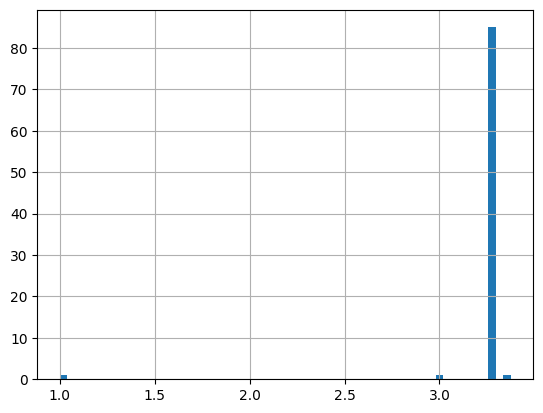

In [28]:
# most look good
ratios.hist(bins=60)

In [29]:
errors = ratios[ratios.lt(3.2) | ratios.gt(3.35)]
errors

26     3.375959
46     3.003003
647    1.000000
Name: 0, dtype: float64

In [30]:
# Only three errors: one is small, one in yards, one in feet
wind.loc[errors.index,:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
26,Arizona,NaN,Navajo,Structures,Meters,782,"Navajo County Ord. Art 20, 6-10(4)(w)",Setback is minimum half mile (2640 Feet) to re...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
46,California,NaN,Lassen,Height,Meters,33.3,Lassen County Code § 18.108.280(1),Maximum Height of 100 feet without use permit,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
647,Iowa,NaN,Johnson,Structures,Meters,1000,Johnson County Dev. Ord. § 8:5.8,Greater of 1000' setback or 1.1 max tip height,NaN,NaN,NaN,NaN,2021.0,NaN,NaN


Now for solar

In [31]:
feet = solar["Comment"].str.lower().str.extract(".*?(\d*,?\d+\.?\d*)(?:'| feet).*").squeeze().str.replace(',', '').astype(float)
is_distance = solar["Value Type"].str.lower().eq("meters")

In [32]:
is_distance.sum()

703

In [33]:
# not great coverage
feet.loc[is_distance].count()

132

In [34]:
ratios = feet.loc[is_distance].div(pd.to_numeric(solar.loc[is_distance, "Value"], errors='coerce').values)

<AxesSubplot: >

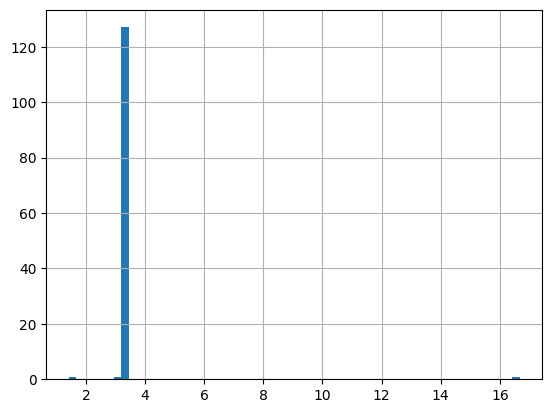

In [35]:
# most look good
ratios.hist(bins=60)

In [36]:
errors = ratios[ratios.lt(3.2) | ratios.gt(3.35)]
errors

6       1.415094
126     3.000000
130    16.666667
476     3.199692
479     3.199692
Name: 0, dtype: float64

In [37]:
# parsing error, yards, parsing error, rounding, rounding
solar.loc[errors.index,:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
6,California,NaN,Butte,Property Line,Meters,10.6,Butte County Code § 24-157(c),20 foot setback plus an additional 15' adjacen...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
126,Illinois,NaN,Adams,Height,Meters,10,Adams County Code Ord. § 5-7-3(c),30' Max Height,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
130,Illinois,NaN,Carroll,Property Line,Meters,6,Carroll County Code § 725.1(f),20 foot setback unless next to residential zon...,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
476,Nebraska,NaN,Madison,Roads,Meters,25.94,Madison County Zoning Regs. § 603(C),83' setback to centerline of roads,NaN,NaN,NaN,NaN,2018.0,NaN,NaN
479,Nebraska,NaN,Pierce,Roads,Meters,25.94,Pierce County Zoning Regs. § 6.04.01,83' setback to centerline of roads,NaN,NaN,NaN,NaN,2018.0,NaN,NaN


#### Distance formulas: Tip Height multipliers, constants, or both
Setbacks are commonly expressed as either constant distances (eg 100 meters) or as a multiple of turbine max tip height (eg 1.1x). But sometimes they are both, aka a linear equation (eg 1.1x + 20 meters).

* to facilitate computation, the linear expressions should be broken into pieces.

In [38]:
# 22 (1.2%) entries have a linear equation
wind['Value'].str.contains('\+').fillna(False).agg(['sum', 'mean'])

sum     22.000000
mean     0.012002
Name: Value, dtype: float64

In [39]:
wind[wind['Value'].str.contains('\+').fillna(False)].sample(5)

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
823,Kansas,NaN,Seward,Transmission,Max tip-height Multiplier,1 + 12.19 Meters,Seward County Zoning Art. 27,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
757,Kansas,NaN,Geary,Roads,Max tip-height Multiplier,1 + 15.24 meters,Geary County Zoning Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
1441,North Dakota,NaN,Oliver,Roads,Max tip-height Multiplier,1 + 22.86 Meters,Section 14 wind energy facilities,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
770,Kansas,NaN,Jefferson,Roads,Max tip-height Multiplier,1 + 15.24 meters,Jefferson County Zoning Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
795,Kansas,NaN,Osage,Roads,Max tip-height Multiplier,1+ 15.24 Meters,Osage County Wind Energy Ordinance Sec 11-102(5),NaN,NaN,NaN,NaN,2010.0,2022.0,NaN,NaN


In [40]:
# no linear solar stuff
solar['Value'].str.contains('\+').fillna(False).agg(['sum', 'mean'])

sum     0.0
mean    0.0
Name: Value, dtype: float64

## Uniqueness Validation
Primary key is row number. The tuple (state, city/town, county, feature type, value type) does not uniquely identify rows because of conditionals buried in the "Comment" field.

For wind:
* there are a few duplicates with conflicting values. Most look like updates (one has a later "Captured Date") so I'll plan to use the latest one.
* one (Allegany County, MD) is a triple-valued conditional. Other rows like that were expressed with a single value "1/2/3"
* Adams and LaSalle IL have multiple structure setbacks conditional on either on/off site or whether they are residential.

For solar:
* a handful of duplicates that differ only in the "updated" columns
* some places have different setbacks conditioned on residential zoning or front/side of parcel

In [41]:
pd.options.display.max_colwidth = None
wind[wind.duplicated(subset=['State', 'City/Town', 'County', 'Feature Type'], keep=False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
38,California,NaN,Kern,Property Line,Max tip-height Multiplier,2,Kern County Code § 19.64.140(F),lesser of 2x max tip height or 500 feet to property line unless owned by same project developer if project is less than 40 acres in size,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,California,NaN,Kern,Property Line,Max tip-height Multiplier,1.5,Kern County Code § 19.64.140(F),lesser of 1.5x max tip height or 500 feet to property line unless owned by same project developer if project is more than 40 acres in size,NaN,NaN,NaN,NaN,2018.0,2021.0,No Change
45,California,NaN,Lassen,Structures,Meters,6,Lassen County Code § 18.108.280 (2),NaN,20 foot setback to any structure on the property,NaN,NaN,NaN,2021.0,NaN,NaN
47,California,NaN,Lassen,Structures,Meters,3.6576,Lassen County Code § 18.108.280 (2),NaN,NaN,NaN,NaN,NaN,2018.0,2021.0,No Change
65,California,NaN,San Bernardino,Property Line,Max tip-height Multiplier,2,San Bernadino County Dev. Code § 84.29.030,"Setback of 2x max tip height if project is on less than 40 acres, waived if common property line is shared by project owner",NaN,NaN,NaN,NaN,NaN,2022.0,NaN
66,California,NaN,San Bernardino,Property Line,Max tip-height Multiplier,1.5,San Bernadino County Dev. Code § 84.29.030,"Setback of 1.5x max tip height if project is on more than 40 acres, waived if common property line is shared by project owner",NaN,NaN,NaN,NaN,NaN,2022.0,NaN
161,Illinois,NaN,Adams,Structures,Meters,402.3,Adams County Code § 5-6-7(f),Primary Structures offsite,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
164,Illinois,NaN,Adams,Structures,Max tip-height Multiplier,1.1,Adams County Code § 5-6-7(f),Primary structure onsite,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
268,Illinois,NaN,LaSalle,Structures,Meters,365.76,LaSalle County Ord. § 7.1(RR),1200 foot setback to residences,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
270,Illinois,NaN,LaSalle,Structures,Hub-height Multiplier,1.5,LaSalle County Ord. § 7.1(RR),"1.5 x tower height for ""other structures""",NaN,NaN,NaN,NaN,2021.0,NaN,NaN


In [42]:
solar[solar.duplicated(subset=['State', 'City/Town', 'County', 'Feature Type'], keep=False)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
37,Florida,NaN,Clay,Property Line,Meters,7.62,Clay County Land Development Code § 3-2(bo),25' Setbacks if not adjacent to residential zones,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
38,Florida,NaN,Clay,Property Line,Meters,30.48,Clay County Land Development Code § 3-2(bo),100' setback if adjacent to residential zone,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
50,Florida,NaN,Jefferson,Property Line,Meters,30.48,Jefferson County Land Development Code § 2.11.4,100' landscape buffer from vacant or nonresidential parcels,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
51,Florida,NaN,Jefferson,Property Line,Meters,60.96,Jefferson County Land Development Code § 2.11.4,200' landscape buffer for residential parcels,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
219,Indiana,NaN,Clinton,Property Line,Meters,15.24,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
220,Indiana,NaN,Clinton,Structures,Meters,60.96,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
221,Indiana,NaN,Clinton,Height,Meters,6.096,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Indiana,NaN,Clinton,Property Line,Meters,15.24,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Indiana,NaN,Clinton,Structures,Meters,60.96,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Indiana,NaN,Clinton,Height,Meters,6.096,Clinton County Ord. §406.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Set Membership Validation

#### State
Will check exact values when assigning FIPS codes

In [43]:
# <= 51
wind['State'].nunique()

44

In [44]:
# <= 51
solar['State'].nunique()

36

#### Feature Type
* some mis-spellings and mixed plurals
* bunch of named entities like rivers/lakes/highways

In [45]:
wind['Feature Type'].str.strip().str.lower().value_counts(dropna=False)

structures                   372
property line                353
roads                        344
sound                        219
transmission                 182
height                        91
railroads                     61
banned                        54
water                         35
minimum lot size              22
tower density                 18
density                       15
shadow flicker                13
rivers                         8
highways                       7
total installation             3
missouri river                 3
wabash river                   2
oil & gas pipelines            2
maximum installation size      1
property                       1
lake audubon                   1
lake sakakawea                 1
appalachian trail              1
waccamaw river                 1
pee dee river                  1
lake oahe                      1
highway                        1
black river                    1
north santee river             1
mississipp

In [46]:
solar['Feature Type'].str.strip().str.lower().value_counts(dropna=False)

property line              232
height                     190
structures                 137
roads                      117
minimum lot size            49
sound                       33
highway                     20
maximum lot size            14
waters                       7
density                      5
maximum lot coverage         4
coverage                     4
total installation           4
moratorium                   2
noise                        2
total installation size      2
banned                       2
maximum project size         2
rivers                       2
lakes                        1
mimimum lot size             1
property lines               1
wetlands                     1
sounds                       1
m.d. route 413               1
u.s. route 13                1
railroads                    1
road                         1
lankford highway             1
Name: Feature Type, dtype: int64

#### Value Type
* some mis-spellings and mixed plurals
* mixed "n/a" and NaN

In [47]:
wind['Value Type'].str.strip().str.lower().value_counts(dropna=False)

max tip-height multiplier    928
meters                       516
dba                          218
NaN                           57
rotor-diameter multiplier     28
rotor diameter multiplier     28
acres                         23
hrs/year                      13
hub-height multiplier          8
turbines                       3
kw                             2
meter                          2
turbine count                  1
minimum lot size               1
rotor-radius                   1
max tip-height                 1
rotor diameter mutliplier      1
rotor diameter                 1
max-tip height multiplier      1
Name: Value Type, dtype: int64

In [48]:
solar['Value Type'].str.strip().str.lower().value_counts(dropna=False)

meters                                 706
acres                                   71
dba                                     36
maximum structure height                 9
percentage                               9
n/a                                      2
NaN                                      2
maximum structure height multiplier      1
meter                                    1
megawatt                                 1
Name: Value Type, dtype: int64

#### "Updated Type"
* some misplaced entires that look like they belong in the "comments" column

In [52]:
wind['Updated Type'].str.strip().str.lower().value_counts(dropna=False)

NaN                                                 1821
meters                                                 5
max tip-height multiplier                              3
20 foot setback to any structure on the property       1
prohibition on utility scale wind energy systems       1
max tip height multiplier + ft                         1
dba                                                    1
Name: Updated Type, dtype: int64

In [54]:
# all empty
solar['Updated Type'].value_counts(dropna=False)

NaN    838
Name: Updated Type, dtype: int64

#### Update Status
* many of these look like they should be "Updated Comment"

In [55]:
wind['Update Status'].str.strip().str.lower().value_counts(dropna=False)

NaN                                                        1605
no change                                                   192
changed                                                      13
change from meters to multiplier                              4
changed from 1.1 to 1.5                                       3
changed max tip-height to meters                              1
changed from 50 to 45                                         1
changed from 305 to 457.2                                     1
changed from "highways" to "banned"                           1
changed from 304.5 to 1.1 max tip height                      1
changed from 228.6 to 304.5                                   1
changed from 228.6 to 304.8                                   1
marshall county banned commercial wind in 2013                1
change from 50 to 60 dba                                      1
changed from 160.2 to 182.88 meters                           1
changed from 152 to 213 meters          

In [57]:
# all NaN
solar['Update Status'].value_counts(dropna=False)

NaN    838
Name: Update Status, dtype: int64

## Type Validation

#### Value
Should be numeric, but a few multivalued, equation, or range entries break that assumption.

In [49]:
wind['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     6.000000
mean    0.003273
Name: Value, dtype: float64

In [166]:
wind.loc[wind['Value'].str.contains('/').fillna(False),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
28,California,NaN,Butte,Sound,dBA,55/50/45,Butte County Code § 24-157(E); Butte County Code 41A(7),55 dbA daytime; 50 dBa evening (7-10pm); 45 dba nighttime (10pm-7am),NaN,NaN,NaN,NaN,2021.0,NaN,NaN
72,California,NaN,San Luis Obispo,Sound,dBa,70/65,San Luis Obispo County Code § 22.32.060(d)(4); San Luis Obispo County Code 22.10.120(B),"70 dBa maximum daytime (7am-10pm), 65 dBa Nighttime (10pm-7am)",NaN,NaN,NaN,NaN,2021.0,NaN,NaN
78,California,NaN,Tehama,Sound,dBa,50/45,Tehama County Code § 17.83.080,50 dBa Day time/ 45 dBa Nighttime,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
114,Colorado,NaN,Lincoln,Sound,dBA,60/50,Lincoln County Zoning Resolution 3-210 (F)(7),60 dBa daytime (7am to 7pm) 50 dBa nighttime (7pm to 7am),NaN,NaN,NaN,NaN,2021.0,NaN,NaN
141,Florida,NaN,Osceola,Sound,dBA,55/45,Osceola County Code § 3.9(G),55 dBa daytime (7am to sunset) 45 dBa nighttime (Sunset to 7am,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
1103,Nebraska,NaN,Hamilton,Sound,dBA,37/40,Hamilton County Zoning Regs. § 8.08.07,37 dB from 8pm to 8am; 40 dB from 8am to 8pm,NaN,NaN,NaN,2019.0,2022.0,NaN,NaN


In [60]:
wind['Value'].str.contains('\+').fillna(False).agg(['sum', 'mean'])

sum     22.000000
mean     0.012002
Name: Value, dtype: float64

In [167]:
wind.loc[wind['Value'].str.contains('\+').fillna(False),:]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
102,Colorado,NaN,Elbert,Property Line,Max tip-height Multiplier,1 + 25 ft,Elbert County Zoning Regulations Art. 5 § 26,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
738,Kansas,NaN,Crawford,Roads,Max tip-height Multiplier,1 + 15.24 meters,Crawford County Zoning Art. 16,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
757,Kansas,NaN,Geary,Roads,Max tip-height Multiplier,1 + 15.24 meters,Geary County Zoning Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
770,Kansas,NaN,Jefferson,Roads,Max tip-height Multiplier,1 + 15.24 meters,Jefferson County Zoning Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
772,Kansas,NaN,Kearny,Roads,Max tip-height Multiplier,1 + 15.24 meters,Kearny County Zoning Ordinance,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
778,Kansas,NaN,Lyon,Roads,Max tip-height Multiplier,1+ 22.86 Meters,Lyon County Wind Energy Ordinance Art. 8 Sec. 808,NaN,Max tip Height Multiplier + ft,22.86,Changed from 22.86 Meters to one times the WECS height plus 22.86 Meters,2008.0,2018.0,2022.0,Changed
779,Kansas,NaN,Lyon,Transmission,Max tip-height Multiplier,1 + 12.19 Meters,Lyon County Wind Energy Ordinance Art. 8 Sec. 808,NaN,NaN,NaN,NaN,2008.0,2022.0,NaN,NaN
795,Kansas,NaN,Osage,Roads,Max tip-height Multiplier,1+ 15.24 Meters,Osage County Wind Energy Ordinance Sec 11-102(5),NaN,NaN,NaN,NaN,2010.0,2022.0,NaN,NaN
807,Kansas,NaN,Reno,Property Line,Max tip-height Multiplier,1+ 15.24 Meters,Reno County Zoning Ordinance Art. 23 CWECS Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
808,Kansas,NaN,Reno,Roads,Max tip-height Multiplier,1+ 15.24 Meters,Reno County Zoning Ordinance Art. 23 CWECS Regulations,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [61]:
wind['Value'].str.contains('or less').fillna(False).agg(['sum', 'mean'])

sum     2.000000
mean    0.001091
Name: Value, dtype: float64

In [59]:
# all the rest work
pd.to_numeric(wind.loc[~wind['Value'].str.contains('/|\+|or less').fillna(False), "Value"])

0         NaN
1        40.0
2       782.0
3         1.5
4        40.0
        ...  
1828     45.0
1829      1.1
1830      1.1
1831      5.5
1832      5.5
Name: Value, Length: 1803, dtype: float64

In [63]:
solar['Value'].str.contains('/').fillna(False).agg(['sum', 'mean'])

sum     5.000000
mean    0.005967
Name: Value, dtype: float64

In [65]:
solar['Value'].str.contains('-').fillna(False).agg(['sum', 'mean'])

sum     1.000000
mean    0.001193
Name: Value, dtype: float64

In [66]:
# all the rest are numeric
pd.to_numeric(solar.loc[~solar['Value'].str.contains('/|-').fillna(False), "Value"])

0       2.000
1       6.100
2      23.000
3       6.100
4         NaN
        ...  
833    60.960
834    30.480
835     4.572
836    10.000
837     4.572
Name: Value, Length: 832, dtype: float64

In [172]:
# all the rest are numeric
(solar.loc[solar['Value'].str.contains('/|-').fillna(False), :])

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
52,Florida,NaN,Leon,Property Line,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,"75' setback if facility is less than 50 acres, 200' if greater than 50 acres",NaN,NaN,NaN,NaN,2021.0,NaN,NaN
53,Florida,NaN,Leon,Roads,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,See above,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
54,Florida,NaN,Leon,Structures,Meters,22.86/60.96,Leon County Land Development Code § 10-6.820,See above,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
60,Florida,NaN,Palm Beach,Property Line,Meters,7.62/5,Palm Beach Unified Development Land Code § 7(C)(8),25 foot setback if lot size is greater than 50 Acres/15' if less than 50 acres,NaN,NaN,NaN,NaN,2021.0,NaN,NaN
730,Utah,NaN,Kane,Sound,dBA,65/50,Kane County Code Ords. § 9-24-3,65 db at property line; 50 db at nearest residence,NaN,NaN,NaN,2013.0,NaN,NaN,NaN
821,Washington,NaN,Klickitat,Structures,Meters,152.4 - 457.2,Klickitat County Code Ords. § 19.39:8,Range of setbacks ranging from 500-1500 feet based on geographic factors,NaN,NaN,NaN,2010.0,NaN,NaN,NaN


#### Ordinance Year
all numeric

In [79]:
# All valid years or missing
pd.to_datetime(wind['Ordinance Year'], format='%Y')

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
1828   NaT
1829   NaT
1830   NaT
1831   NaT
1832   NaT
Name: Ordinance Year, Length: 1833, dtype: datetime64[ns]

In [80]:
# All valid years or missing
pd.to_datetime(solar['Ordinance Year'], format='%Y')

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
833   NaT
834   NaT
835   NaT
836   NaT
837   NaT
Name: Ordinance Year, Length: 838, dtype: datetime64[ns]

#### Original Captured Date


In [74]:
# All valid years or missing
pd.to_datetime(wind['Original Captured Date'], format="%Y")

0      2018-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
1828   2022-01-01
1829   2022-01-01
1830   2022-01-01
1831   2022-01-01
1832   2022-01-01
Name: Original Captured Date, Length: 1833, dtype: datetime64[ns]

In [75]:
# All valid years or missing
pd.to_datetime(solar['Original Captured Date'], format="%Y")

0     2021-01-01
1     2021-01-01
2     2021-01-01
3     2021-01-01
4     2021-01-01
         ...    
833          NaT
834          NaT
835          NaT
836          NaT
837          NaT
Name: Original Captured Date, Length: 838, dtype: datetime64[ns]

#### New Capture Date

In [76]:
# All valid years or missing
pd.to_datetime(wind['New Capture Date'], format="%Y")

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
1828   NaT
1829   NaT
1830   NaT
1831   NaT
1832   NaT
Name: New Capture Date, Length: 1833, dtype: datetime64[ns]

In [77]:
# All valid years or missing
pd.to_datetime(solar['New Capture Date'], format="%Y")

0     NaT
1     NaT
2     NaT
3     NaT
4     NaT
       ..
833   NaT
834   NaT
835   NaT
836   NaT
837   NaT
Name: New Capture Date, Length: 838, dtype: datetime64[ns]

## Range Validation

#### Ordinance Year

<AxesSubplot: >

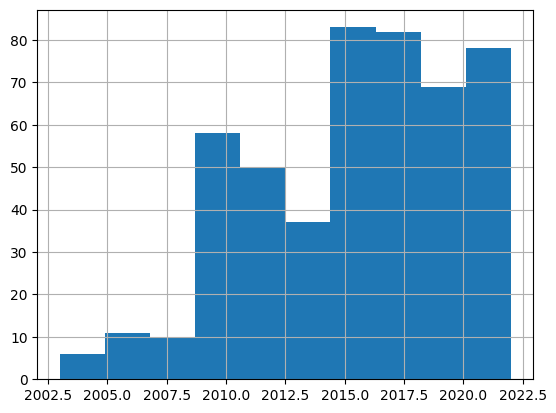

In [81]:
# All valid years or missing
pd.to_datetime(wind['Ordinance Year'], format='%Y').dt.year.hist()

<AxesSubplot: >

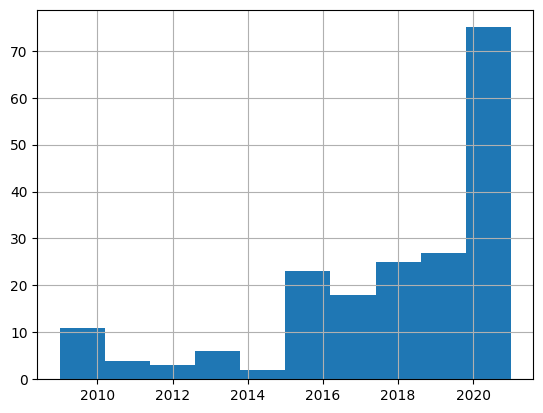

In [82]:
# All valid years or missing
pd.to_datetime(solar['Ordinance Year'], format='%Y').dt.year.hist()

#### Original Captured Date


<AxesSubplot: >

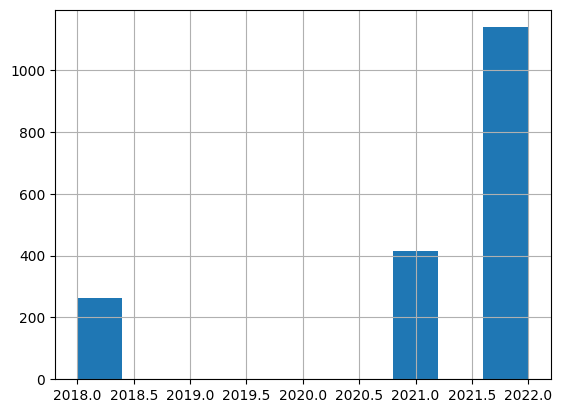

In [83]:
# All valid years or missing
pd.to_datetime(wind['Original Captured Date'], format="%Y").dt.year.hist()

<AxesSubplot: >

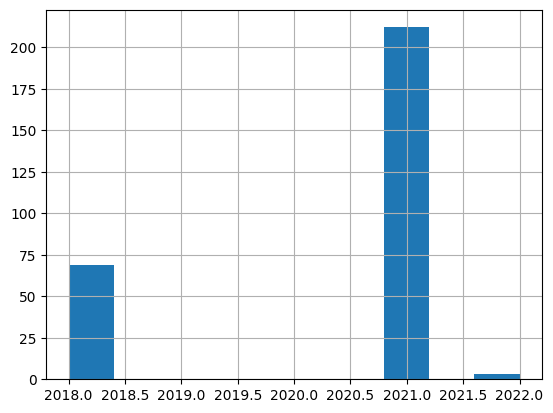

In [84]:
# All valid years or missing
pd.to_datetime(solar['Original Captured Date'], format="%Y").dt.year.hist()

#### New Capture Date

<AxesSubplot: >

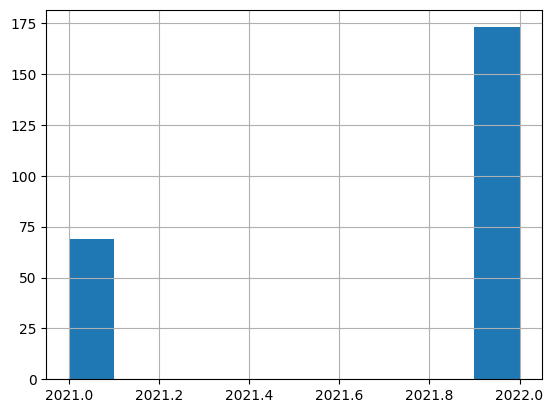

In [85]:
# All valid years or missing
pd.to_datetime(wind['New Capture Date'], format="%Y").dt.year.hist()

<AxesSubplot: >

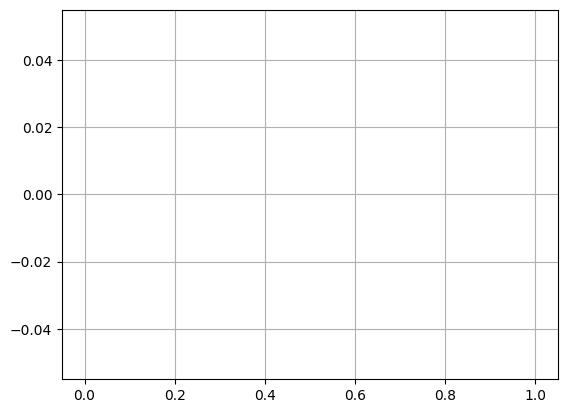

In [86]:
# All valid years or missing
pd.to_datetime(solar['New Capture Date'], format="%Y").dt.year.hist()

#### Value

<AxesSubplot: >

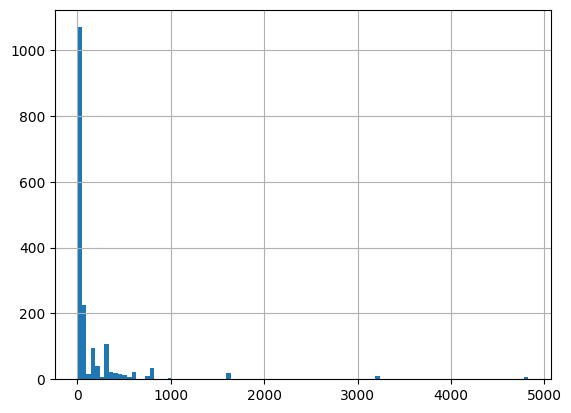

In [88]:
# ignore the handful of weird values for now
pd.to_numeric(wind.loc[~wind['Value'].str.contains('/|\+|or less').fillna(False), "Value"]).hist(bins=100)

<AxesSubplot: >

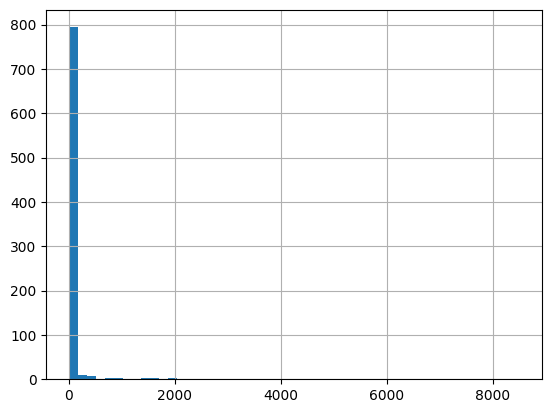

In [89]:
# ignore the handful of weird values for now
pd.to_numeric(solar.loc[~solar['Value'].str.contains('/|-').fillna(False), "Value"]).hist(bins=50)

## Cross-Field Validation
New Capture Date >= Original Capture Date >= Ordinance Year
* poor date modeling by NREL makes these values hard to interpret
* Some "Original Capture Date"s are less than "Ordinance Year" even when "New Capture Date" is null, indicating no update has occured.
* wind: some Ordinance year appear to have been updated (between orignal and new capture dates) even though there are no entries for other update columns

In [140]:
# fill with dates that satisfy the condition. This is because comparisions with NaN output False, but I want them to produce True
ord_yr_wind = pd.to_datetime(wind['Ordinance Year'], format='%Y').fillna(pd.Timestamp('1990-01-01'))
orig_cap_yr_wind = pd.to_datetime(wind['Original Captured Date'], format='%Y').fillna(ord_yr_wind)
new_cap_yr_wind = pd.to_datetime(wind['New Capture Date'], format='%Y').fillna(new_cap_yr_wind)

In [144]:
ord_yr_solar = pd.to_datetime(solar['Ordinance Year'], format='%Y').fillna(pd.Timestamp('1990-01-01'))
orig_cap_yr_solar = pd.to_datetime(solar['Original Captured Date'], format='%Y').fillna(ord_yr_solar)
new_cap_yr_solar = pd.to_datetime(solar['New Capture Date'], format='%Y').fillna(new_cap_yr_solar)

<AxesSubplot: >

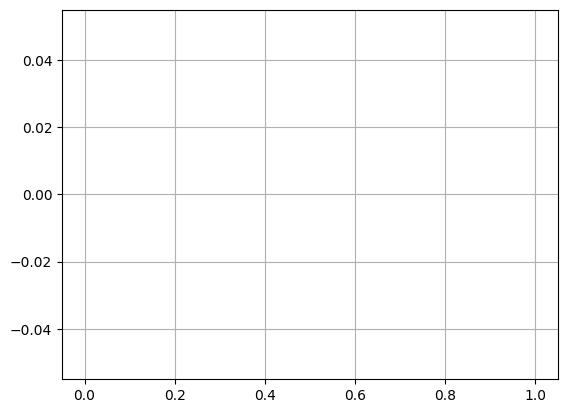

In [132]:
# All valid years or missing
pd.to_datetime(solar['New Capture Date'], format="%Y").dt.year.hist()

In [141]:
new_cap_yr_wind.ge(orig_cap_yr_wind).all()

True

In [145]:
new_cap_yr_solar.ge(orig_cap_yr_solar).all()

True

In [146]:
orig_cap_yr_wind.ge(ord_yr_wind).all()

False

In [147]:
wind[~orig_cap_yr_wind.ge(ord_yr_wind)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
1325,North Carolina,NaN,Currituck,Banned,NaN,NaN,"In 2019, Carrituck County amended the UDO to prohibit large scale wind energy facilities",NaN,NaN,NaN,NaN,2019.0,2018.0,2022.0,"Changed from ""Highways"" to ""Banned"""
1628,South Dakota,NaN,Pennington,Transmission,Max tip-height Multiplier,1.5,Pennington County Zoning Ord. § 317(B)(5),NaN,NaN,NaN,NaN,2021.0,2018.0,2022.0,Changed from 1.1 to 1.5
1629,South Dakota,NaN,Pennington,Roads,Max tip-height Multiplier,1.5,Pennington County Zoning Ord. § 317(B)(5),NaN,NaN,NaN,NaN,2021.0,2018.0,2022.0,Changed from 1.1 to 1.5
1630,South Dakota,NaN,Pennington,Structures,Max tip-height Multiplier,1.5,Pennington County Zoning Ord. § 317(B)(5),NaN,NaN,NaN,NaN,2021.0,2018.0,2022.0,Changed from 1.1 to 1.5
1631,South Dakota,NaN,Pennington,Sound,dBA,55,Pennington County Zoning Ord. § 317(B)(5),NaN,NaN,NaN,NaN,2021.0,2018.0,2022.0,No change


In [148]:
orig_cap_yr_solar.ge(ord_yr_solar).all()

False

In [149]:
solar[~orig_cap_yr_solar.ge(ord_yr_solar)]

,State,City/Town,County,Feature Type,Value Type,Value,Citation,Comment,Updated Type,Updated Value,Updated Comment,Ordinance Year,Original Captured Date,New Capture Date,Update Status
458,Missouri,NaN,Warren,Structures,Meters,60.96,Warren County Dev. Code Appdx D. § 4(A)(2),NaN,NaN,NaN,NaN,2020.0,2018.0,NaN,NaN
459,Nebraska,NaN,Cass,Property Line,Meters,9.144,Cass County Zoning Regs. § 8.21.05,30' setback,NaN,NaN,NaN,2021.0,2018.0,NaN,NaN
460,Nebraska,NaN,Cass,Height,Meters,7.62,Cass County Zoning Regs. § 8.21.05,NaN,NaN,NaN,NaN,2021.0,2018.0,NaN,NaN
463,Nebraska,NaN,Dawson,Property Line,Meters,9.144,Dawson County Zoning Regs. § 6.09.05,NaN,NaN,NaN,NaN,2019.0,2018.0,NaN,NaN
464,Nebraska,NaN,Dawson,Height,Meters,3.65,Dawson County Zoning Regs. § 6.09.05,NaN,NaN,NaN,NaN,2019.0,2018.0,NaN,NaN
467,Nebraska,NaN,Hamilton,Property Line,Meters,9.144,Hamilton County Zoning Regs. § 8.09.06,NaN,NaN,NaN,NaN,2019.0,2018.0,NaN,NaN
468,Nebraska,NaN,Hamilton,Height,Meters,3.65,Hamilton County Zoning Regs. § 8.09.06,NaN,NaN,NaN,NaN,2019.0,2018.0,NaN,NaN
472,Nebraska,NaN,Kearney,Wetlands,Meters,402.33,Kearney County Zoning Regs. § 7.42.12,"1320' Setback to USFW designated type III, IV, or V wetlands",NaN,NaN,NaN,2020.0,2018.0,NaN,NaN
473,Nebraska,NaN,Kimball,Property Line,Meters,15.24,Kimball County Zoning Regs. § 20.04.4,NaN,NaN,NaN,NaN,2020.0,2018.0,NaN,NaN
474,Nebraska,NaN,Kimball,Structures,Meters,30.48,Kimball County Zoning Regs. § 20.04.4,NaN,NaN,NaN,NaN,2020.0,2018.0,NaN,NaN
